In [33]:
##Decision tree
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


In [34]:
dataset = load_iris()

In [35]:
print(dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [36]:
df = pd.DataFrame(dataset.data,columns=dataset.feature_names)
d1 = pd.DataFrame(dataset.target,columns=['target'])
df = pd.concat([df,d1],axis=1)

In [37]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [38]:
len(df)

150

In [39]:
##divided in dependent and independent dataset
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [40]:
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [41]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [42]:
##divided into tran and test data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.10,random_state=42)

In [43]:
##model traning
treeClassifier = DecisionTreeClassifier()

In [44]:
treeClassifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [45]:
y_pred = treeClassifier.predict(x_test)

[Text(0.5, 0.9166666666666666, 'x[3] <= 0.8\ngini = 0.666\nsamples = 135\nvalue = [44, 44, 47]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 44\nvalue = [44, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.499\nsamples = 91\nvalue = [0, 44, 47]'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.187\nsamples = 48\nvalue = [0, 43, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.046\nsamples = 42\nvalue = [0, 41, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 41\nvalue = [0, 41, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'x[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini

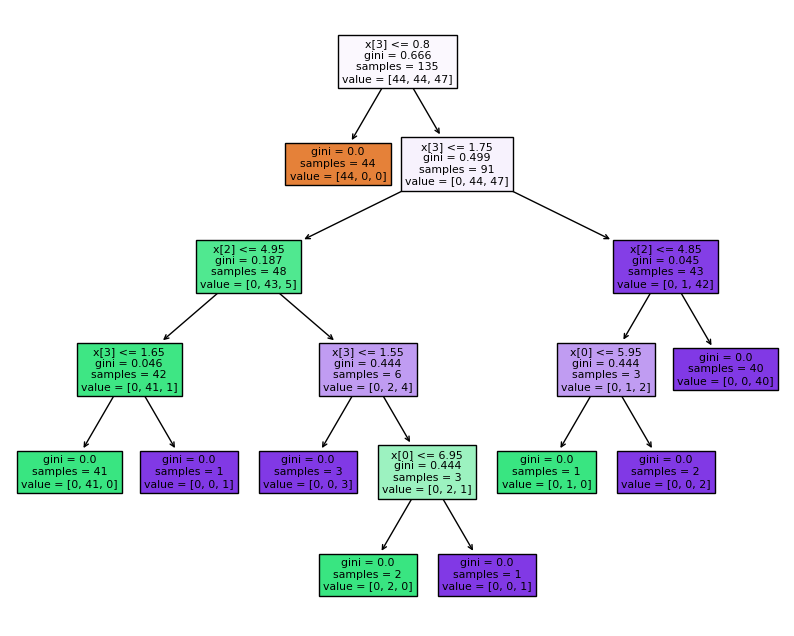

In [46]:
from sklearn import tree
plt.figure(figsize=(10,8))
tree.plot_tree(treeClassifier,filled = True)


In [47]:
##Post pruning
treeClassifier = DecisionTreeClassifier(max_depth=2)
treeClassifier.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'x[2] <= 2.45\ngini = 0.666\nsamples = 135\nvalue = [44, 44, 47]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 44\nvalue = [44, 0, 0]'),
 Text(0.6, 0.5, 'x[3] <= 1.75\ngini = 0.499\nsamples = 91\nvalue = [0, 44, 47]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.187\nsamples = 48\nvalue = [0, 43, 5]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.045\nsamples = 43\nvalue = [0, 1, 42]')]

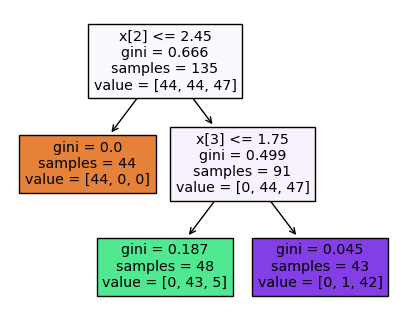

In [48]:
from sklearn import tree
plt.figure(figsize=(5,4))
tree.plot_tree(treeClassifier,filled = True)


In [49]:
y_pred = treeClassifier.predict(x_test)

In [50]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0])

In [51]:
y_test

73     1
18     0
118    2
78     1
76     1
31     0
64     1
141    2
68     1
82     1
110    2
12     0
36     0
9      0
19     0
Name: target, dtype: int64

In [52]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [53]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

1.0
[[6 0 0]
 [0 6 0]
 [0 0 3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         3

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



In [54]:
##pre pruning 
from sklearn.model_selection import GridSearchCV 

In [58]:
parameter = {
    'criterion':('gini','entropy','log_loss'),
    'splitter':('best','random'),
    'max_depth':[2,3,4,5],
    'min_samples_split':[2,3,4,5,6],
    'min_samples_leaf':[1,2,3],
    'max_features':('auto','sqrt','log2')
}

In [59]:
obj = GridSearchCV(DecisionTreeClassifier(),param_grid=parameter,cv=5)

In [60]:
obj.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ('gini', 'entropy', 'log_loss'),
                         'max_depth': [2, 3, 4, 5],
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5, 6],
                         'splitter': ('best', 'random')})

In [61]:
obj.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'splitter': 'best'}

In [62]:
treeClassifier = DecisionTreeClassifier(criterion='gini',max_depth=3,max_features='sqrt',min_samples_leaf=3,min_samples_split=5,splitter='best')

In [63]:
treeClassifier.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, max_features='sqrt', min_samples_leaf=3,
                       min_samples_split=5)

In [64]:
y_pred = treeClassifier.predict(x_test)

In [65]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0])

In [66]:
y_test

73     1
18     0
118    2
78     1
76     1
31     0
64     1
141    2
68     1
82     1
110    2
12     0
36     0
9      0
19     0
Name: target, dtype: int64

[Text(0.375, 0.875, 'x[2] <= 2.45\ngini = 0.666\nsamples = 135\nvalue = [44, 44, 47]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 44\nvalue = [44, 0, 0]'),
 Text(0.5, 0.625, 'x[0] <= 6.15\ngini = 0.499\nsamples = 91\nvalue = [0, 44, 47]'),
 Text(0.25, 0.375, 'x[3] <= 1.65\ngini = 0.393\nsamples = 41\nvalue = [0, 30, 11]'),
 Text(0.125, 0.125, 'gini = 0.121\nsamples = 31\nvalue = [0, 29, 2]'),
 Text(0.375, 0.125, 'gini = 0.18\nsamples = 10\nvalue = [0, 1, 9]'),
 Text(0.75, 0.375, 'x[3] <= 1.75\ngini = 0.403\nsamples = 50\nvalue = [0, 14, 36]'),
 Text(0.625, 0.125, 'gini = 0.219\nsamples = 16\nvalue = [0, 14, 2]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 34\nvalue = [0, 0, 34]')]

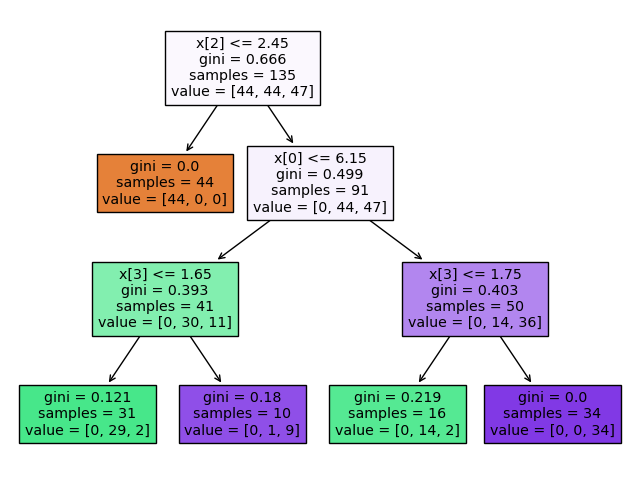

In [68]:
from sklearn import tree

plt.figure(figsize=(8,6))
tree.plot_tree(treeClassifier,filled=True)

In [70]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

1.0
[[6 0 0]
 [0 6 0]
 [0 0 3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         3

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



In [71]:
import pickle
pickle.dump(treeClassifier,open('treeclassifier.pkl','wb'))

In [72]:
obj_pre = pickle.load(open('treeclassifier.pkl','rb'))

In [73]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [75]:
obj_pre.predict([[5.1,3.5,1.4,0.2]])

array([0])

In [76]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [77]:
obj_pre.predict([[5.9,3.0,5.1,1.8]])

array([2])